# Chapter - Graph Theory

In [1]:
import pandas as pd #Dataframes
import networkx as nx #redes
import matplotlib.pyplot as plt #gráficos
import numpy as np

In [2]:
G1 = nx.complete_graph(range(1,7))
G1.name='Complete'
print(nx.info(G1))

G2 = nx.star_graph(range(1,7))
G2.name='Star'
print(nx.info(G2))

G3 = nx.Graph()
G3.name='Ring'
G3.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)])
print(nx.info(G3))

Name: Complete
Type: Graph
Number of nodes: 6
Number of edges: 15
Average degree:   5.0000
Name: Star
Type: Graph
Number of nodes: 6
Number of edges: 5
Average degree:   1.6667
Name: Ring
Type: Graph
Number of nodes: 6
Number of edges: 6
Average degree:   2.0000


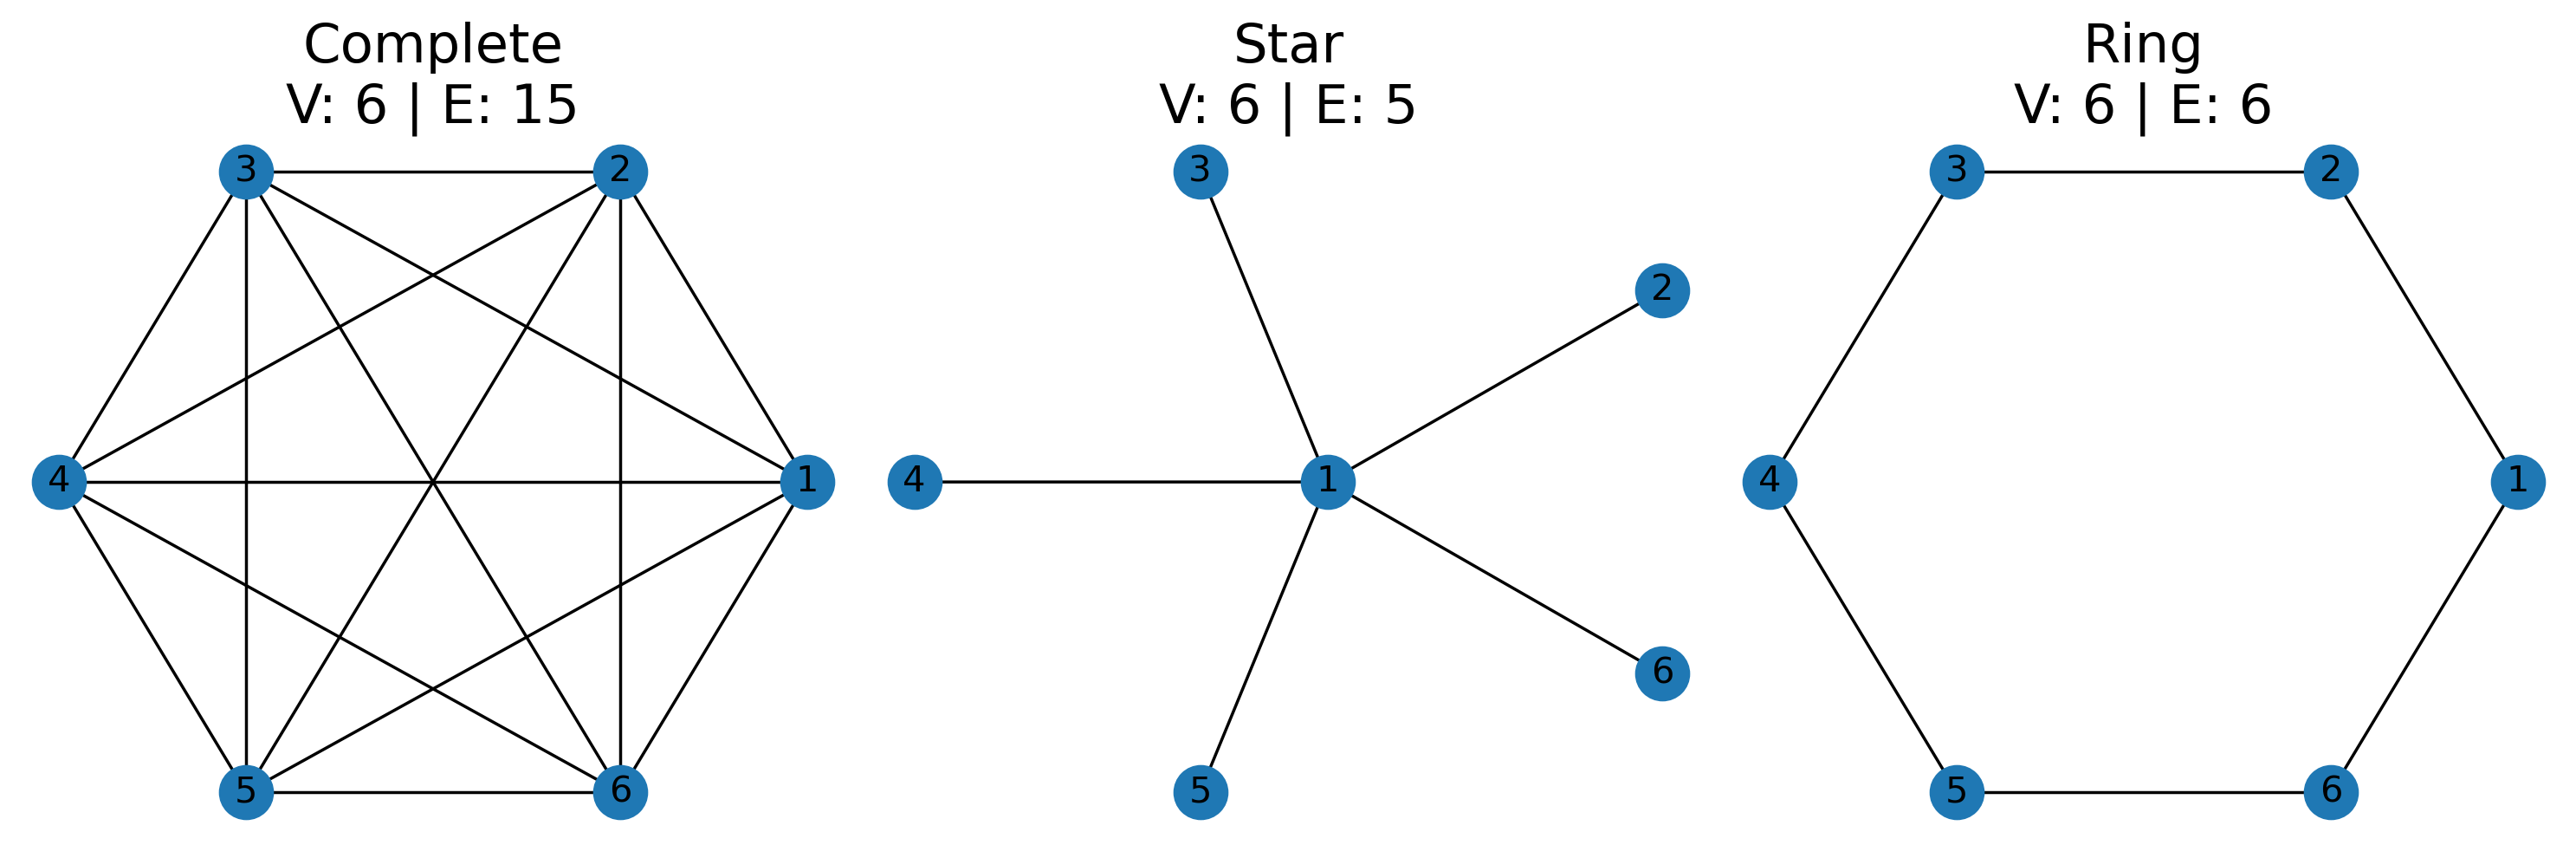

In [3]:
plt.figure(figsize=(12,4),dpi=250)
i=1
for G in [G1,G2,G3]:
    plt.subplot(1,3,i)
    i+=1
    nx.draw_kamada_kawai(G,with_labels=1)
    plt.title(G.name 
              + '\nV: '
              +str(G.number_of_nodes())
              +' | E: '
              +str(G.number_of_edges())
              ,fontsize=18)
plt.tight_layout()
plt.savefig('ouput/GraphTheory_Types.pdf',format='pdf')
plt.show()

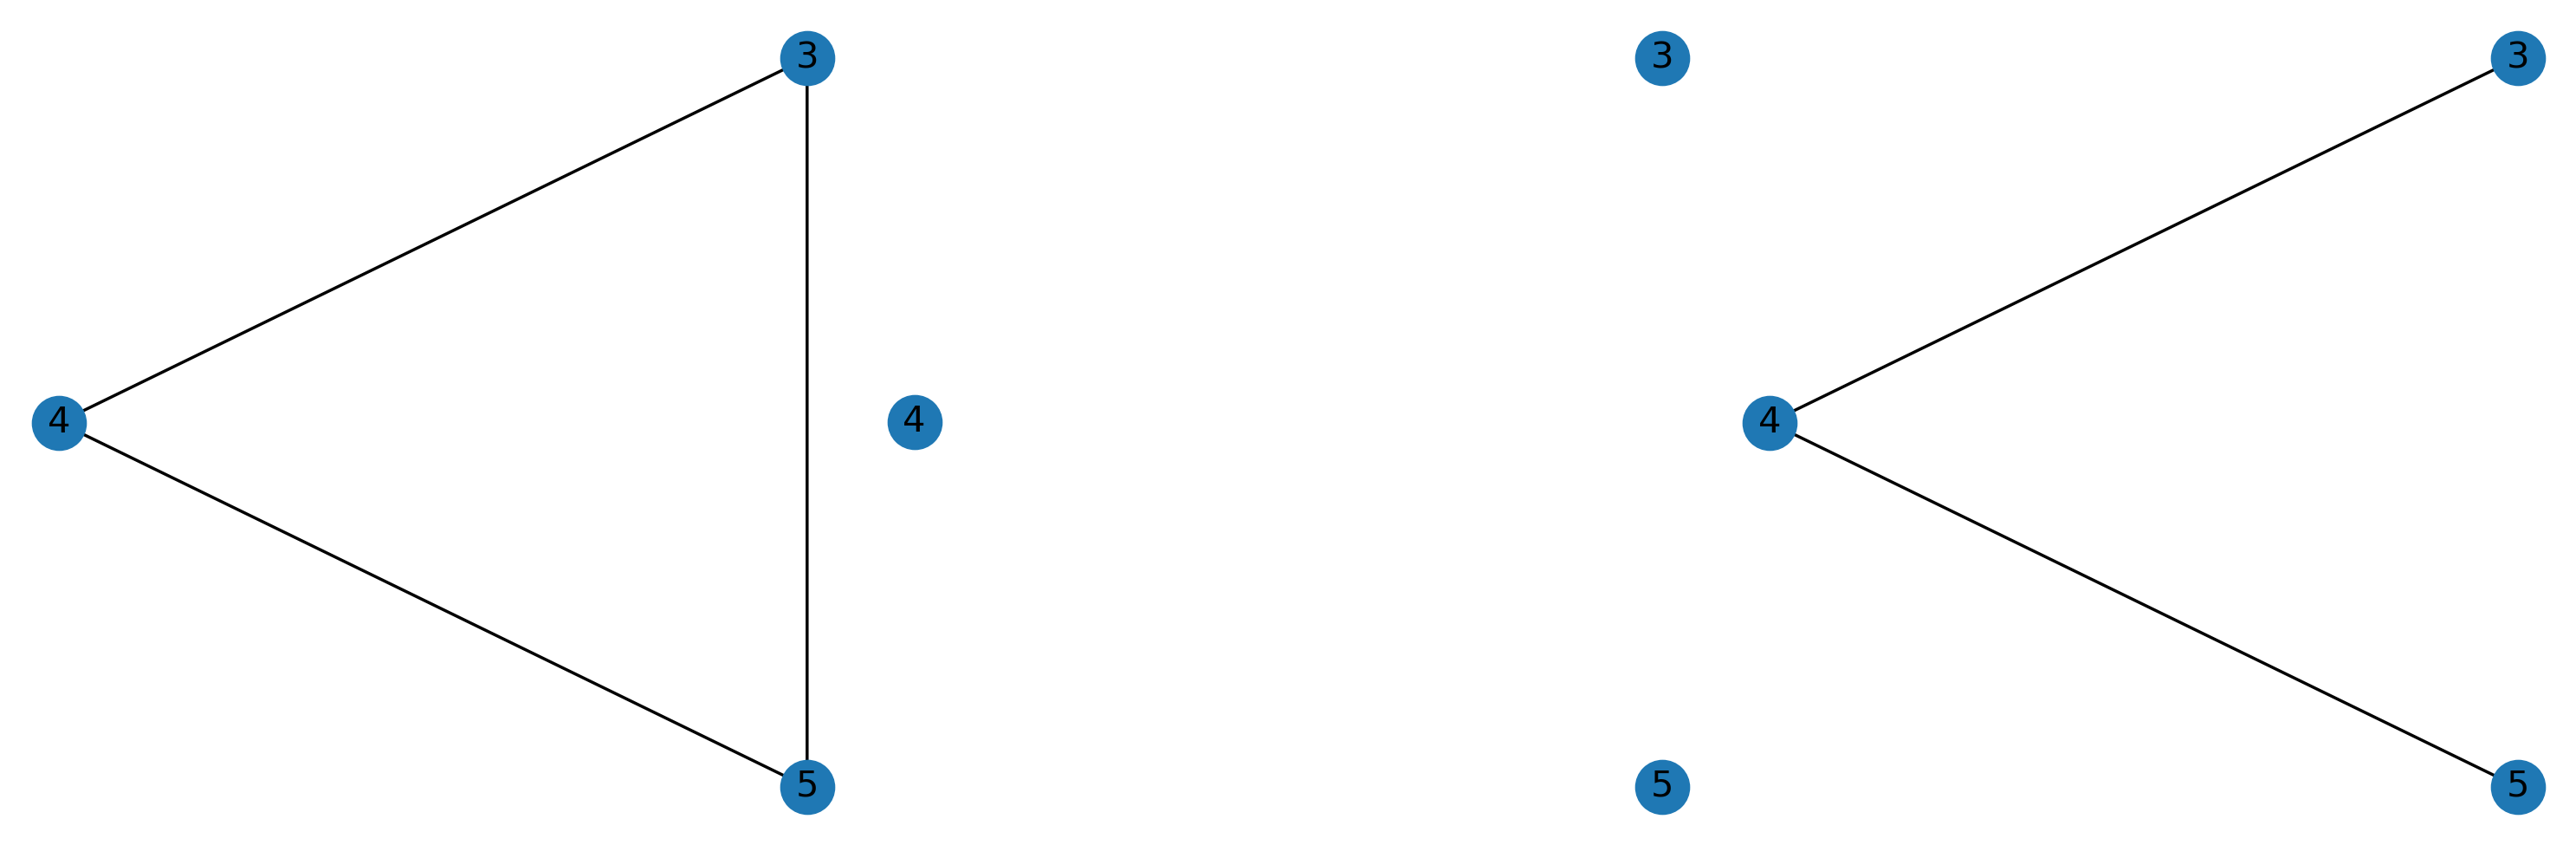

In [19]:
plt.figure(figsize=(12,4),dpi=250)
i=1
for G in [G1,G2,G3]:
    plt.subplot(1,3,i)
    i+=1
    nx.draw(G.subgraph([3,4,5]),with_labels=1,pos=nx.kamada_kawai_layout(G))
plt.tight_layout()
#plt.savefig('ouput/GraphTheory_SubGraphs.pdf',format='pdf')
plt.show()

### Direct and weight

In [4]:
def plotDiGrapth(G,pos):        
    nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.15')    
    edge_labels={}
    for v1, v2, w in G.edges(data=True):
        if pos[v1][0] > pos[v2][0]:
            pesoIda = w["weight"]
            if (v2,v1) in G.edges:
                pesoVolta = G.edges[(v2,v1)]["weight"]
                edge_labels[(v1,v2)]=f'{pesoIda}\n\n{pesoVolta}'
            else:
                edge_labels[(v1,v2)]=f'{pesoIda}\n\n'
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black',font_size=10)

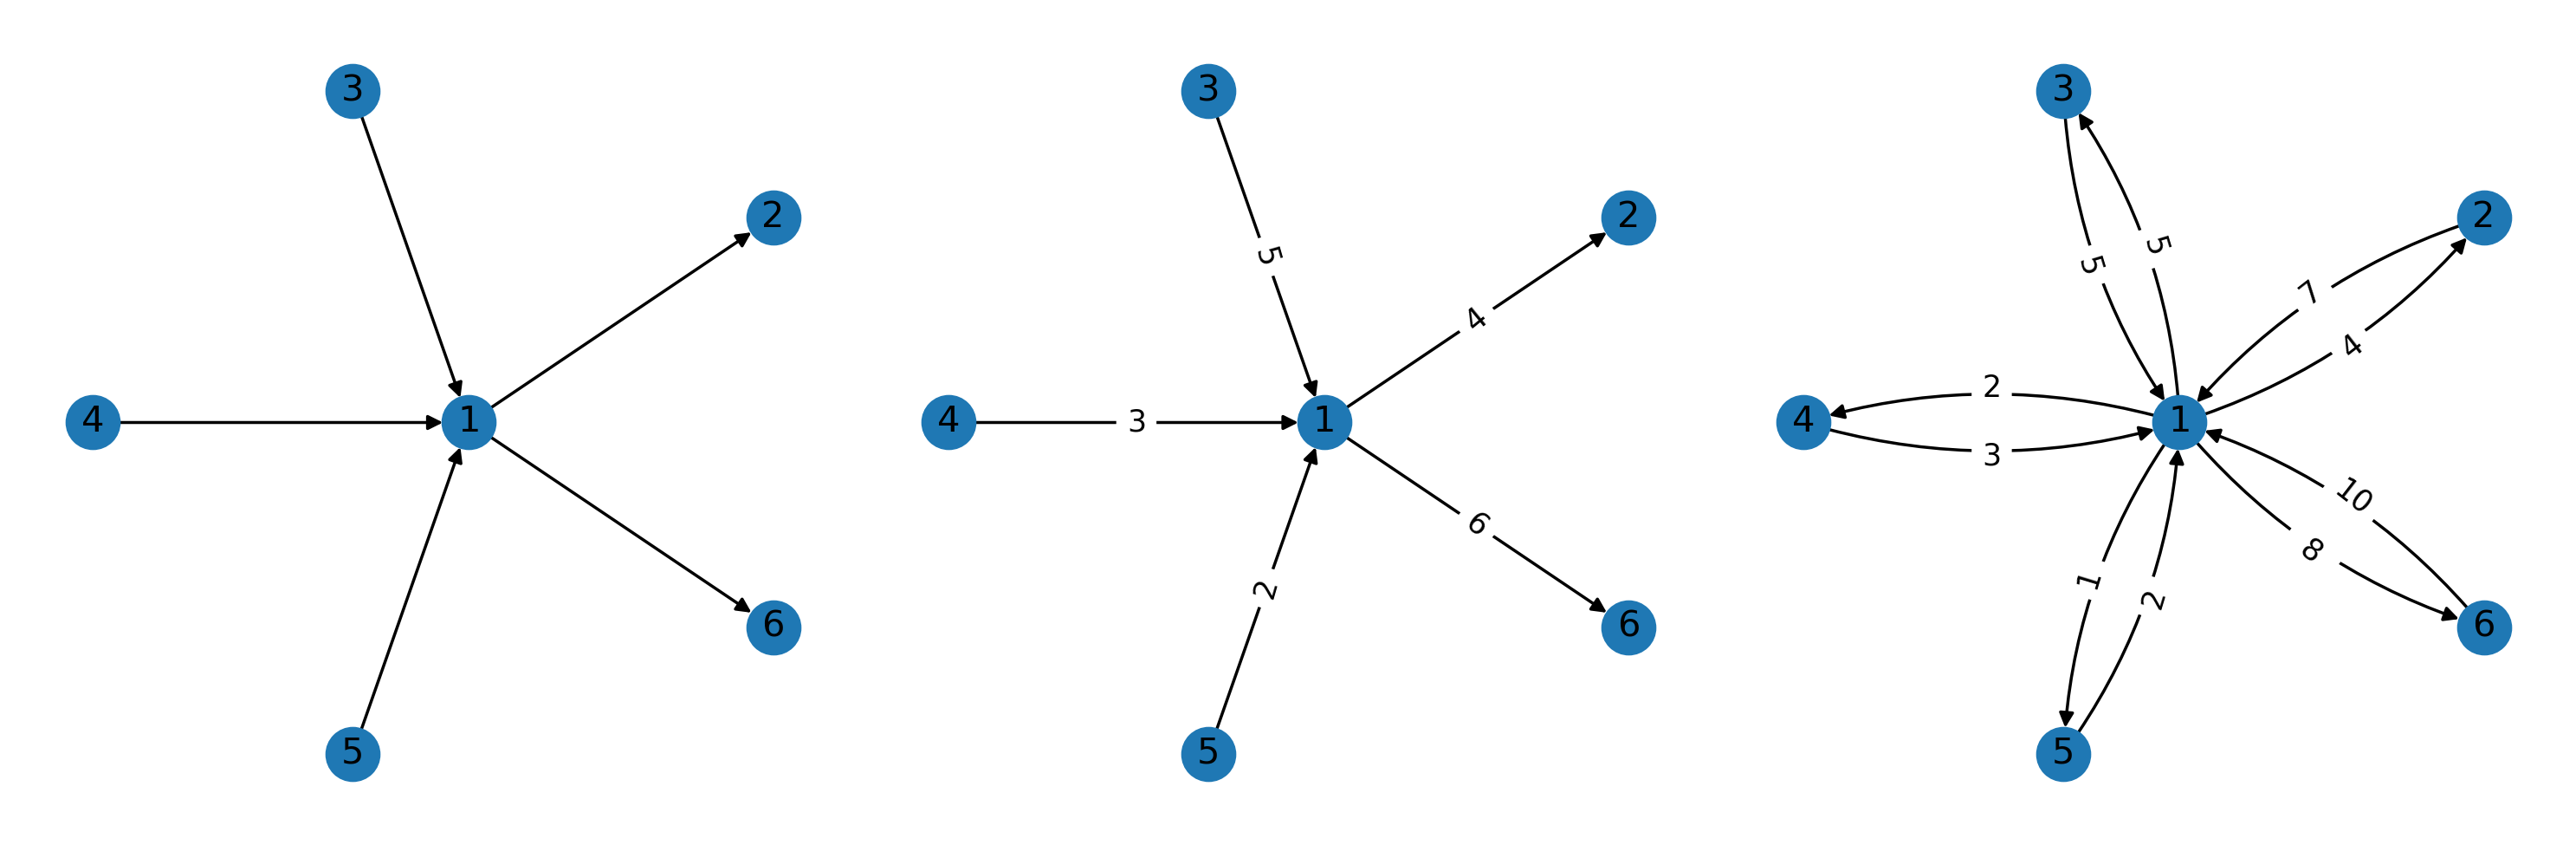

In [5]:
G4 = nx.DiGraph()
G4.add_edges_from([(4,1),(5,1),(3,1),(1,2),(1,6)])

G5 = nx.DiGraph()
G5.add_edge(4,1,weight=3)
G5.add_edge(5,1,weight=2)
G5.add_edge(3,1,weight=5)
G5.add_edge(1,2,weight=4)
G5.add_edge(1,6,weight=6)

G6 = nx.DiGraph()
G6.add_edge(4,1,weight=3)
G6.add_edge(5,1,weight=2)
G6.add_edge(3,1,weight=5)
G6.add_edge(1,2,weight=4)
G6.add_edge(1,6,weight=8)
G6.add_edge(1,4,weight=2)
G6.add_edge(1,5,weight=1)
G6.add_edge(1,3,weight=5)
G6.add_edge(2,1,weight=7)
G6.add_edge(6,1,weight=10)

nodePositions = nx.kamada_kawai_layout(G2)

plt.figure(figsize=(12,4),dpi=250)
i=1
for G in [G4,G5,G6]:
    plt.subplot(1,3,i)
    i+=1
    if(i!=4):
        edgesAttrs = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,edge_labels=edgesAttrs,pos=nodePositions)
        nx.draw(G,pos=nodePositions,with_labels=1)
    else:
        plotDiGrapth(G,nodePositions)
plt.tight_layout()
plt.savefig('ouput/GraphTheory_Types2.pdf',format='pdf')
plt.show()

# Example Network

In [13]:
EN = nx.Graph()
EN.name = 'Example Network'
EN.add_edges_from([(0, 1), (0, 8), (0, 14), (1, 2), (1, 3), (1, 6), (1, 12), (1, 8), (2, 4), (2, 5), (2, 10), (2, 13), (2, 14), (2, 15), (3, 12), (3, 6), (6, 12), (4, 7), (4, 11), (5, 9), (15, 16)])
print(nx.info(EN))

Name: Example Network
Type: Graph
Number of nodes: 17
Number of edges: 21
Average degree:   2.4706


EdgeView([(0, 1), (0, 8), (1, 2), (1, 3), (1, 6), (1, 12), (1, 8), (2, 4), (2, 5), (2, 10), (2, 13), (2, 14), (2, 15), (3, 12), (3, 6), (4, 7), (4, 11), (5, 9), (6, 12), (15, 16)])

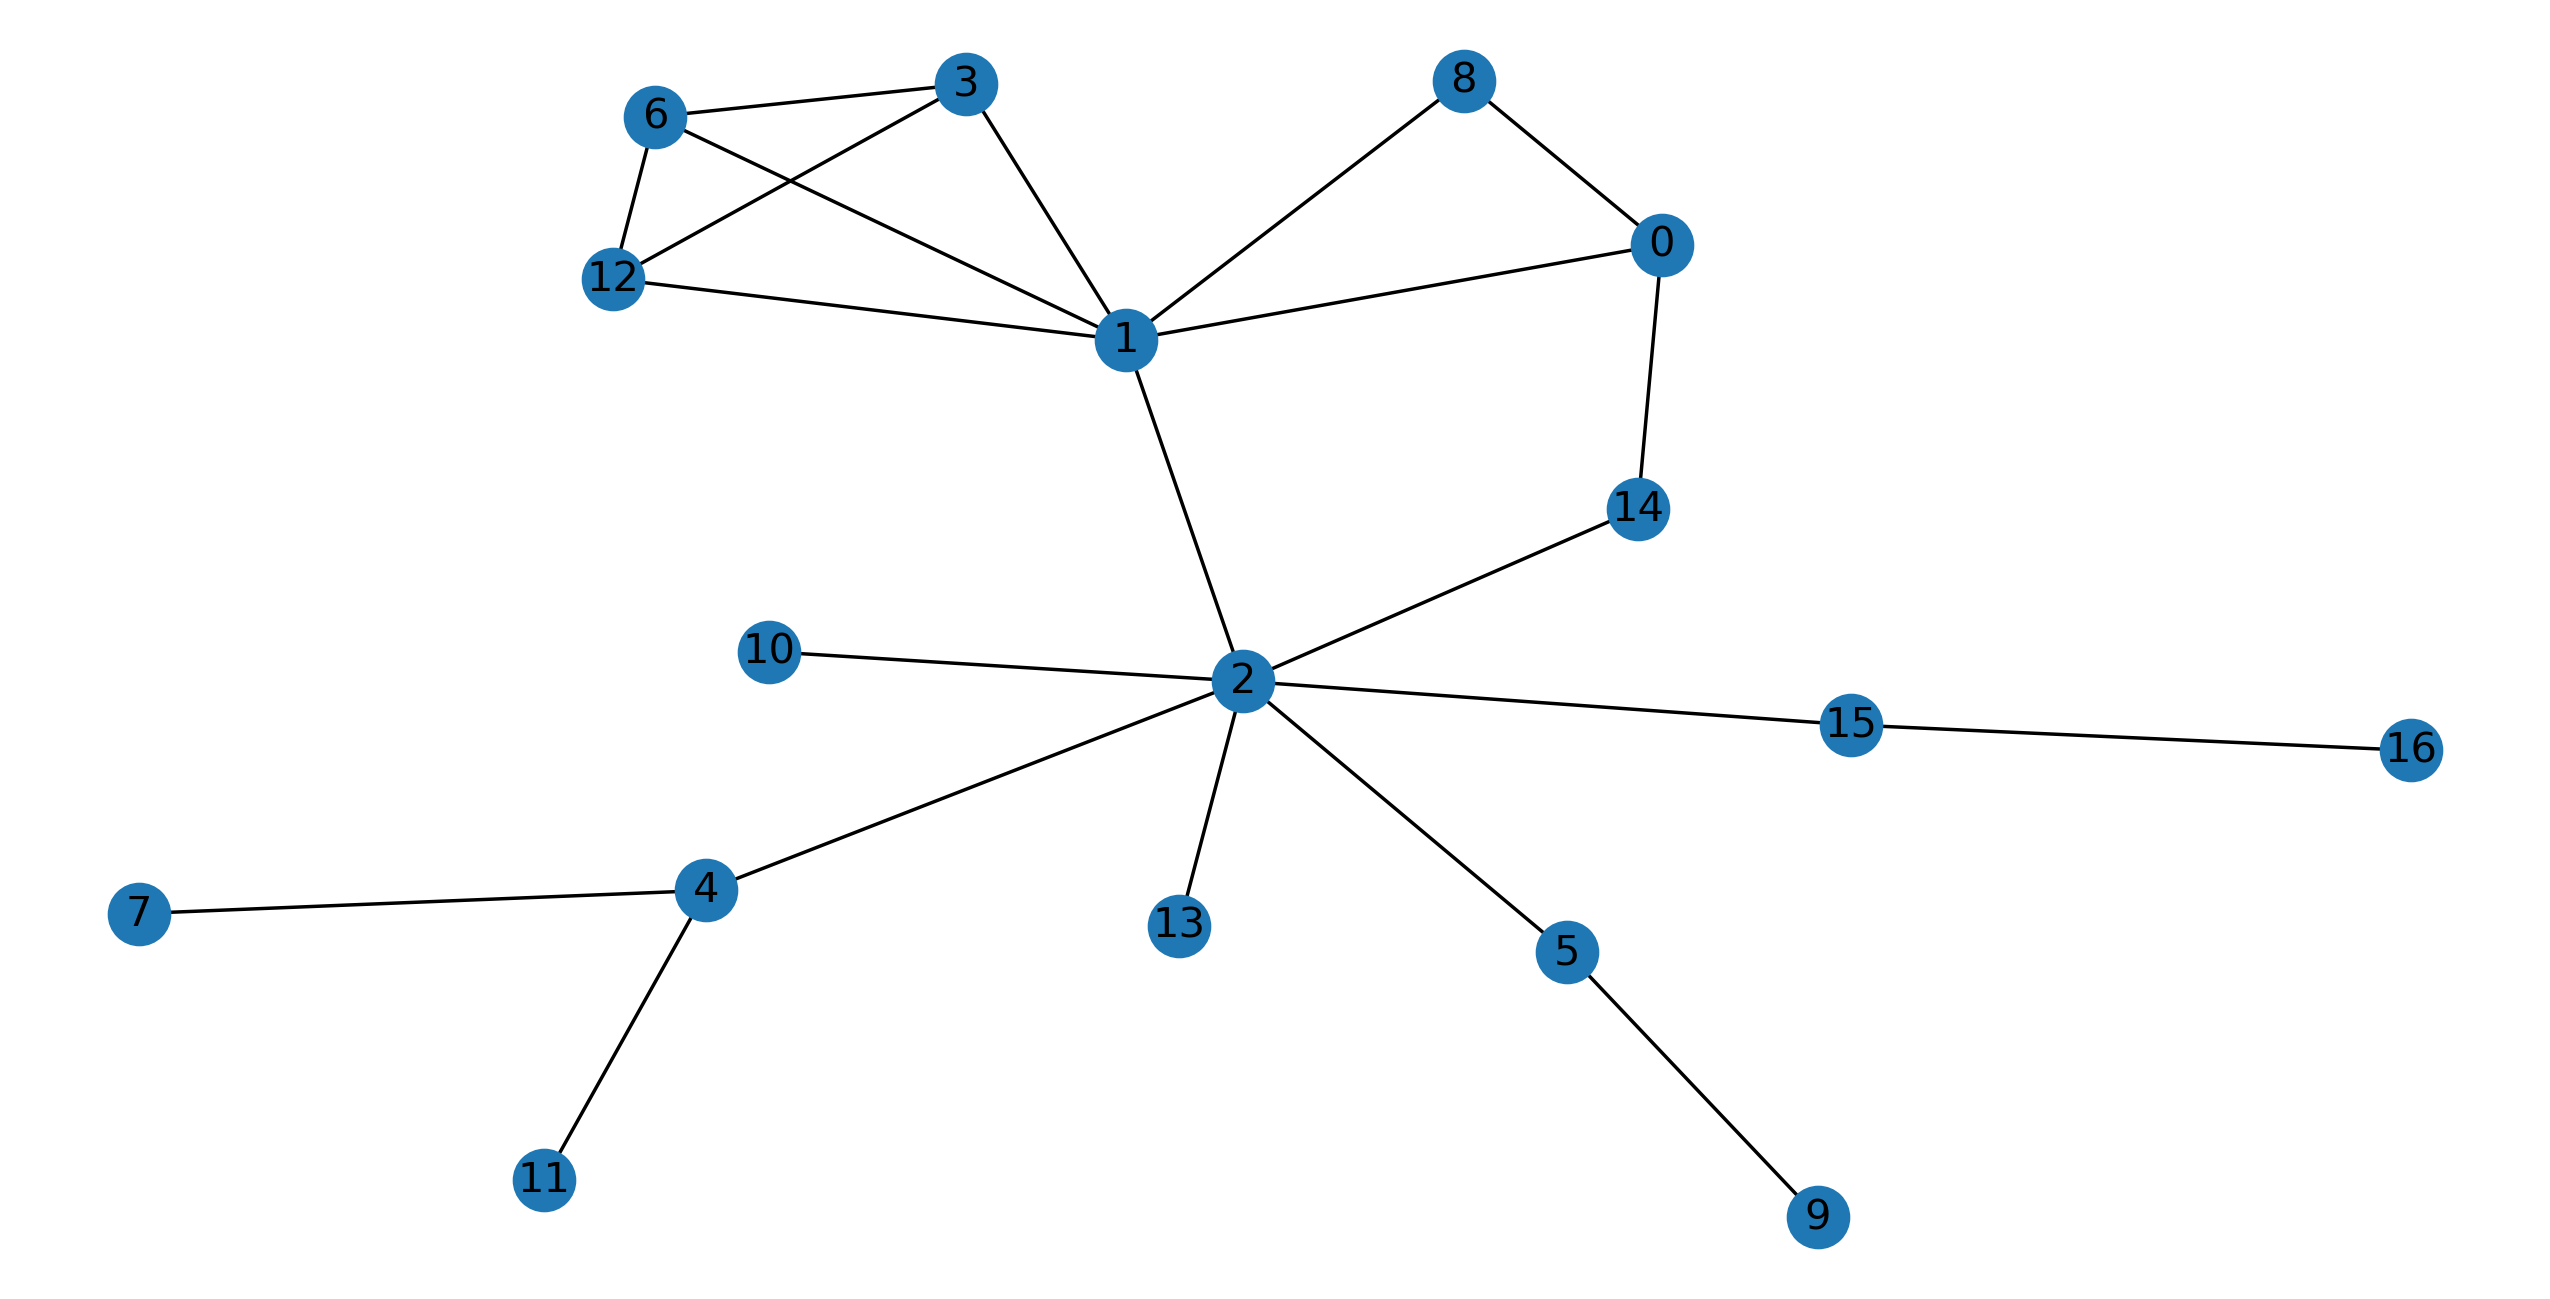

In [14]:
plt.figure(figsize=(10,5),dpi=250)
nx.draw_kamada_kawai(EN,with_labels=1)
plt.savefig('ouput/GraphTheory_ExampleNetwork.pdf',format='pdf')
plt.show()

In [26]:
print(np.mean(list(dict(EN.degree).values())))
sorted(dict(EN.degree).items(), key=lambda x:x[1], reverse=True)

2.4705882352941178


[(2, 7),
 (1, 6),
 (0, 3),
 (3, 3),
 (6, 3),
 (12, 3),
 (4, 3),
 (8, 2),
 (14, 2),
 (5, 2),
 (15, 2),
 (10, 1),
 (13, 1),
 (7, 1),
 (11, 1),
 (9, 1),
 (16, 1)]

In [30]:
list(nx.clique.enumerate_all_cliques(EN))

[[0],
 [1],
 [8],
 [14],
 [2],
 [3],
 [6],
 [12],
 [4],
 [5],
 [10],
 [13],
 [15],
 [7],
 [11],
 [9],
 [16],
 [0, 1],
 [0, 8],
 [0, 14],
 [1, 8],
 [1, 2],
 [1, 3],
 [1, 6],
 [1, 12],
 [14, 2],
 [2, 4],
 [2, 5],
 [2, 10],
 [2, 13],
 [2, 15],
 [3, 6],
 [3, 12],
 [6, 12],
 [4, 7],
 [4, 11],
 [5, 9],
 [15, 16],
 [0, 1, 8],
 [1, 3, 6],
 [1, 3, 12],
 [1, 6, 12],
 [3, 6, 12],
 [1, 3, 6, 12]]